# **Water Quality Classification Using ANN and CNN**

Water quality is a major concern for many businesses, including agriculture, industrial, and public health. Monitoring the quality of bodies of water such as lakes, rivers, and seas is critical for identifying and addressing any pollution or contamination issues that may impact aquatic life, human health, and the environment.

Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN) are strong Deep learning methods for analysing water quality data and detecting trends or anomalies. Based on past data, ANN can be used to forecast activities such as assessing water quality characteristics. CNNs can also be used to do the water quality classification.

As a result, applying ANN and CNN approaches to water quality data can provide significant insights to water management enterprises and organisations such as environmental monitoring agencies, municipalities, and private water firms. These findings can assist decision-makers in making informed decisions about how to allocate resources, solve water quality issues, and ultimately improve the overall health of aquatic ecosystems.

**IMPORTING LIBRARIES**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import tensorflow as tf
from imblearn.over_sampling import SMOTE

In [2]:
tf.__version__

'2.12.0'

In [3]:
df = pd.read_csv('/content/WATERQUALITY.csv')

In [4]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [5]:
df.shape

(7999, 21)

**PRE-PROCESSING**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

### The function finds all occurrences of the '#NUM!' string in the DataFrame df and replaces them with NaN values

In [7]:
df = df.replace({'#NUM!':np.nan})
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [10]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### Converts the data type of the column named 'ammonia' from its original type to a floating-point numeric type and also convering the data type of the column named 'is_safe' from its original type to a integer numeric type

In [12]:
df['ammonia']=df['ammonia'].astype(float)
df['is_safe']=df['is_safe'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### Making two separate datasets, one containing the features (independent variables) and the other containing the target variable (dependent variable)

In [14]:
X = df.drop('is_safe', axis='columns')
y = df['is_safe']

In [15]:
y.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

### To oversample the minority class in the target variable using the Synthetic Minority Over-sampling Technique (SMOTE)

In [16]:
#Using the SMOTE library to oversample the data by randomly creating data 
sm = SMOTE(random_state=27)
X,y = sm.fit_resample(X,y)

### The fit_resample() method of the SMOTE algorithm resamples the dataset by generating synthetic samples of the minority class using interpolation of neighboring samples in the feature space

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
y_test.shape

(2834,)

### To ensure that all feature variables have a similar scale, which can help improve the performance of Deep learning models

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Building the ANN**

The structure and function of the human brain inspired the development of Artificial Neural Networks (ANN), a form of Deep learning algorithm. ANNs are capable of learning and making predictions based on complex data patterns. Each neuron receives input signals, processes them, and sends output signals to other neurons in the network.

When applying ANN to the Water quality dataset, the input layer of the network would consist of neurons representing the various characteristics of the water samples, such as aluminium, ammonia, bacteria, virus, among others. There would be as many neurons in the input layer as there are features in the dataset.


# Initializing the ANN

In [20]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

In [21]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer

In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer

In [23]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Training the ANN**

# Compiling the ANN

* optimizer: Training loss function minimization algorithm. 'Adam', a prominent stochastic optimisation approach, efficiently adjusts neural network weights during training.

* loss: The training loss function used to compare predicted outputs to true labels. For binary classification issues, 'binary_crossentropy' is used.

* metrics: Model performance metrics for training and testing. The list comprises only "accuracy," a frequent classification parameter.


In [24]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set

In [25]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
355/355 [==============================] - 4s 2ms/step - loss: 0.5367 - accuracy: 0.7420
Epoch 2/100
355/355 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.7895
Epoch 3/100
355/355 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8061
Epoch 4/100
355/355 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8351
Epoch 5/100
355/355 [==============================] - 1s 3ms/step - loss: 0.3192 - accuracy: 0.8585
Epoch 6/100
355/355 [==============================] - 1s 2ms/step - loss: 0.3001 - accuracy: 0.8686
Epoch 7/100
355/355 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.8778
Epoch 8/100
355/355 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.8828
Epoch 9/100
355/355 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.8908
Epoch 10/100
355/355 [==============================] - 1s 2ms/step - loss: 0.2399 - accura

In [26]:
print(ann.predict(sc.transform([[1.36, 11.33, 0.04, 2.96, 0.001, 7.23, 0.03, 1.66, 1.08, 0.71, 0.71, 0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05]])) > 0.5)

1/1 [==============================] - 0s 69ms/step
[[ True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Predicting the Test set results

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

89/89 [==============================] - 0s 785us/step


# Making the Confusion Matrix

In [28]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score, classification_report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1381
           1       0.92      0.95      0.93      1453

    accuracy                           0.93      2834
   macro avg       0.93      0.93      0.93      2834
weighted avg       0.93      0.93      0.93      2834



In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1263  118]
 [  78 1375]]


0.9308398023994354

<Axes: >

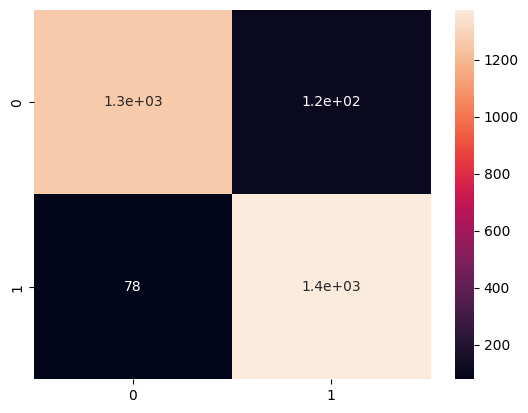

In [31]:
sns.heatmap(cm,annot=True)

**Strengths:**

* ANNs can handle many input variables and detect complex nonlinear water quality parameter relationships.
* They handle noisy data and generalise well to new data.
* For adaptive modelling, ANNs can learn from data and improve.
* Optimisation methods can train ANNs to accurately predict water quality.

**Weaknesses**:

* If the model is too complex or there is not enough training data, ANNs can overfit and perform poorly on new data.
* Building and training ANNs requires a lot of data and computational power.
* Since an ANN model is a black box, it's hard to understand how it predicts.
* Missing or incorrect data may negatively impact ANN performance.






# **Convolutional Neural Network**

CNNs are a type of deep learning algorithm that is often used to process images and signals, but they can also be used to analyse relational datasets like the Water quality dataset.

A CNN has a number of layers called convolutional layers, pooling layers, and fully connected layers. The convolutional layers use a set of filters to separate edges, corners, and forms from the data that comes in. By downsampling, the pooling layers lower the number of dimensions of the extracted features. This helps to avoid overfitting and makes the network run faster. Lastly, the fully linked layers take the extracted features and use a set of weights to make predictions based on the patterns they have learned.

When CNN was used on the Water quality dataset, the input layer of the network would be a two-dimensional matrix with the samples as rows and the water quality traits as columns. This matrix would be sent to the convolutional layers. The convolutional layers would then use a set of filters on the input data to find patterns and relationships between the features.


# **Classification with CNN**

# **CNN MODEL 1**

**IMPORTING LIBRARIES**

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
 
from numpy import unique

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout, Conv1D
from keras.activations import relu, sigmoid


In [34]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [35]:
x = df.drop('is_safe', axis='columns')
y = df['is_safe']

In [36]:
x.shape

(7996, 20)

In [37]:
#Using the SMOTE library to oversample the data by randomly creating data 
sm = SMOTE(random_state=27)
x,y = sm.fit_resample(x,y)

In [38]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [40]:
# Build the model

model1 = Sequential()

* **Sequential()**: Creates a Sequential model object.

* (Conv1D(64,2, activation="relu", input_shape=(20,1))): Adds a 1D convolutional layer with 64 filters of size 2 and ReLU activation function.

* (Conv1D(64,2, activation="relu", input_shape=(20,1))): Adds another 1D convolutional layer with the same specifications as the previous layer.

* (**MaxPooling1D**()): Adds a 1D max pooling layer to downsample the output of the convolutional layers.

* (**Flatten()**): Flattens the output of the previous layer to a 1D array.

In [41]:
model1 = Sequential()
model1.add(Conv1D(64,2, activation="relu", input_shape=(20,1)))
model1.add(Conv1D(64,2, activation="relu", input_shape=(20,1))) 
model1.add(MaxPooling1D())
model1.add(Flatten())
model1.add(Dense(1, kernel_initializer= 'glorot_normal', activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy']) #Adds a fully connected layer with a single output node and sigmoid activation function
model1.summary() # Prints a summary of the model architecture, including the number of parameters in each layer

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            8256      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 577       
                                                                 
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
____________________________________________________

* The '**glorot_normal**' initialization method  improves the stability of the training process.
* The **sigmoid function** maps any input value to a value between 0 and 1, which can be interpreted as a probability that the input belongs to the positive class (in this case, safe water quality).
* The loss parameter is set to '**binary_crossentropy**', which is a common loss function used for binary classification problems.
* The optimizer parameter is set to '**adam**', which is a popular optimization algorithm that adapts the learning rate during training to improve the speed and stability of the optimization process.

In [42]:
model1.fit(train_x, train_y, batch_size=16,epochs=100 , verbose=0)

### Evaluates the performance of the trained CNN model on a test set of data

In [43]:
acc = model1.evaluate(test_x, test_y)
print("Loss:", acc[0], " Accuracy:", acc[1])

133/133 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9344
Loss: 0.17807351052761078  Accuracy: 0.934368371963501


In [44]:
print(model1.predict(sc.transform([[1.36, 11.33, 0.04, 2.96, 0.001, 7.23, 0.03, 1.66, 1.08, 0.71, 0.71, 0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05]])) > 0.5)

1/1 [==============================] - 0s 62ms/step
[[ True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Predicting the Test set results

In [45]:
yp = model1.predict(test_x)
yp = (yp > 0.5)

133/133 [==============================] - 0s 1ms/step


# Making the Confusion Matrix

In [46]:
print(classification_report(test_y, yp))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2146
           1       0.94      0.93      0.93      2105

    accuracy                           0.93      4251
   macro avg       0.93      0.93      0.93      4251
weighted avg       0.93      0.93      0.93      4251



In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(test_y, yp)
print(cm1)
accuracy_score(test_y, yp)

[[2015  131]
 [ 148 1957]]


0.9343683839096684

<Axes: >

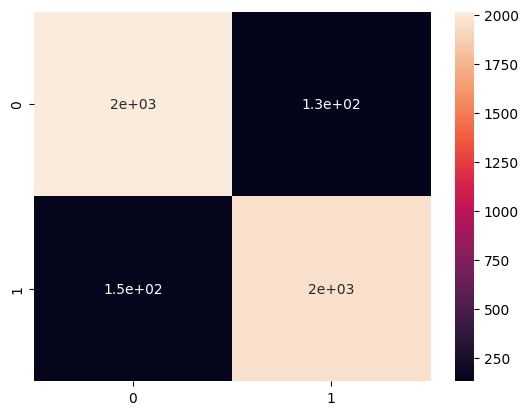

In [48]:
sns.heatmap(cm1,annot=True)

# **CNN MODEL 2**

In [49]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [50]:
x = df.drop('is_safe', axis='columns')
y = df['is_safe']

In [51]:
x.shape

(7996, 20)

In [52]:
#Using the SMOTE library to oversample the data by randomly creating data 
sm = SMOTE(random_state=27)
x,y = sm.fit_resample(x,y)

In [53]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [55]:
# Build the model

model2 = Sequential()

* Sequential(): Creates a Sequential model object.

* (Conv1D(32,2, activation="relu", input_shape=(20,1))): Adds a 1D convolutional layer with 32 filters of size 2 and ReLU activation function. 

* (MaxPooling1D()): Adds a 1D max pooling layer to downsample the output of the convolutional layer.

* (Conv1D(64,2, activation="relu", input_shape=(20,1))): Adds another 1D convolutional layer with 64 filters of size 2 and ReLU activation function.

* (MaxPooling1D()): Adds another 1D max pooling layer to downsample the output of the second convolutional layer.

* (Flatten()): Flattens the output of the previous layer to a 1D array.

In [56]:
model2 = Sequential()
model2.add(Conv1D(32,2, activation="relu", input_shape=(20,1)))
model2.add(MaxPooling1D())
model2.add(Conv1D(64,2, activation="relu", input_shape=(20,1)))
model2.add(MaxPooling1D())
model2.add(Flatten())
model2.add(Dense(1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Adds a fully connected layer with a single output node and sigmoid activation function
model2.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy']) # Compiles the model with binary cross-entropy loss function, Adam optimizer, and accuracy metric
model2.summary() # Prints a summary of the model architecture

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 19, 32)            96        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 8, 64)             4160      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

* The kernel_initializer parameter is set to '**glorot_uniform**', which is another initialization method for the layer's weights that samples values from a uniform distribution between -limit and limit, where limit is sqrt(6 / (fan_in + fan_out)).
* The activation parameter is set to '**sigmoid**', which is the activation function used by the output units of the layer.


In [57]:
model2.fit(train_x, train_y, batch_size=16,epochs=100 , verbose=0)

In [58]:
acc = model2.evaluate(test_x, test_y)
print("Loss:", acc[0], " Accuracy:", acc[1])

133/133 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9130
Loss: 0.22755421698093414  Accuracy: 0.9129616618156433


In [59]:
print(model2.predict(sc.transform([[1.36, 11.33, 0.04, 2.96, 0.001, 7.23, 0.03, 1.66, 1.08, 0.71, 0.71, 0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05]])) > 0.5)

1/1 [==============================] - 0s 66ms/step
[[ True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Predicting the Test set results

In [60]:
yp = model2.predict(test_x)
yp = (yp > 0.5)

133/133 [==============================] - 0s 1ms/step


# Making the Confusion Matrix

In [61]:
print(classification_report(test_y, yp))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2150
           1       0.96      0.86      0.91      2101

    accuracy                           0.91      4251
   macro avg       0.92      0.91      0.91      4251
weighted avg       0.92      0.91      0.91      4251



In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(test_y, yp)
print(cm2)
accuracy_score(test_y, yp)

[[2066   84]
 [ 286 1815]]


0.9129616560809222

<Axes: >

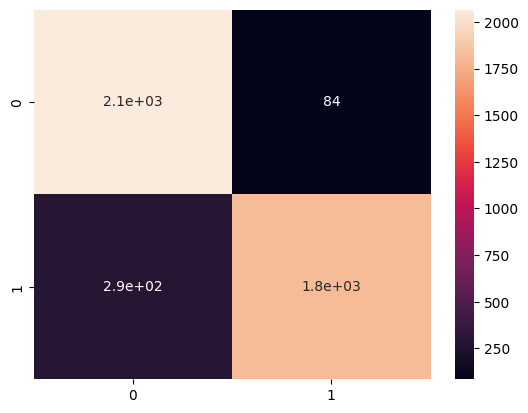

In [63]:
sns.heatmap(cm2,annot=True)

**Strengths**:

* CNNs can detect spatial and temporal patterns in water quality data.
* CNNs can handle large datasets and high-dimensional input data.
* They're suitable for real-world applications because they're noise-tolerant and can generalise well.
* CNNs learn features from data and predict water quality accurately.

**Weaknesses**:

* CNNs need a lot of data to learn complex patterns, which can be hard to get.
* If the model is too complex or there is not enough training data, they can overfit the data and perform poorly on new data.
* CNNs require expensive hardware to train.
* CNNs have many computation layers, making it hard to understand how the model made a prediction.

# **CONCLUSION**

In conclusion, Artificial Neural Network (ANN) models as well as Convolutional Neural Network (CNN) models are both viable options for the classification of water quality. The ANN is a flexible model that can deal with many different sorts of inputs, and it has been effectively used to tasks involving the prediction of water quality. When working with relational datasets, it is a viable solution that, with the appropriate adjustment of the hyperparameters, is capable of achieving high levels of accuracy. However, in order to understand complicated patterns, it may require a significant quantity of data and suffer from the problem of overfitting.

On the other hand, CNN is a powerful model that is capable of capturing spatial as well as temporal patterns in the data, which makes it well-suited for both image and time-series data. CNN has achieved a level of performance that is considered to be state-of-the-art in a variety of computer vision applications and can be used to detect changes in the images of water quality. However, CNN may also require a huge quantity of data in order to avoid overfitting, and it may be computationally expensive to do so.

In a nutshell, the decision between an ANN model and a CNN model is determined by the kind of data and the particular problem that needs to be solved. Both of these models have their own advantages and disadvantages, and it is essential to choose the proper model and optimise its hyperparameters in order to get a satisfactory level of performance.


# **Bibliography**



*   Machine learning with PyTorch and Scikit-Learn : develop machine learning and deep learning models with Python, Authors: Raschka and Sebastian, 2022.
*   Introduction to Artificial Neural Network (ANN) Methods:
What They Are and How to Use Them, Author: Jure Zupan, 1994.
* Understanding of a convolutional neural network, Authors: 
Saad Albawi, Tareq Abed Mohammed and Saad Al-Zawi, 2017.
* Udemy Course: Deep Learning A-Z™ 2023: Neural Networks, AI & ChatGPT Bonus, link: https://www.udemy.com/course/deeplearning/.
* Moodle Page: https://elearning.dbs.ie/course/view.php?id=17405, B9AI104 Deep Learning.
* Dataset from Kaggle Site: https://www.kaggle.com/datasets/mssmartypants/water-quality
* Github Site: https://github.com/AaronWard/Churn-Modelling-Artificial-Neural-Network/blob/master/ann.py




